[community docs](http://python-louvain.readthedocs.io/en/latest/index.html)

[tutpral](http://ryancompton.net/2014/06/16/community-detection-and-colored-plotting-in-networkx/)

In [102]:
import networkx as nx
import community

import matplotlib.pyplot as plt
import numpy as np
import string
%matplotlib inline

In [171]:
n=45

 # Rand Array

In [172]:
array = np.random.randint(0,10, (n,n))
G = nx.from_numpy_matrix(array, parallel_edges=True, create_using=nx.Graph())

# Rand graphs

In [173]:
G = nx.gnp_random_graph(n=n, p=0.15, seed=10)

for e,i,u in G.edges(data=True):
    u['weight'] = np.random.randint(1,30)
#G.edges(data=True)

# Nodes

In [174]:
mapping = dict(zip(G.nodes(), string.ascii_uppercase))
G = nx.relabel_nodes(G, mapping)
G.nodes()

NodeView(('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44))

In [175]:
d = nx.degree(G)
degree= np.array([i[1] for i in d])
degree

array([ 7,  6,  6,  5,  5,  7,  5,  6,  8,  8,  5,  5,  4,  9, 10,  4,  2,
        2,  4, 10,  8,  7,  4,  7,  6,  3,  7,  5, 12,  5,  9, 12,  3,  5,
        9,  5,  9,  4,  4,  5,  4,  4,  4,  9,  4])

# Edges

In [176]:
edges = G.edges()
# colors = [G[u][v]['color'] for u,v in edges]
weights = np.array([G[u][v]['weight'] for u,v in edges])

# Community

In [178]:
part = community.best_partition(G, resolution=1)
values = [part.get(node) for node in G.nodes()]

# Plot

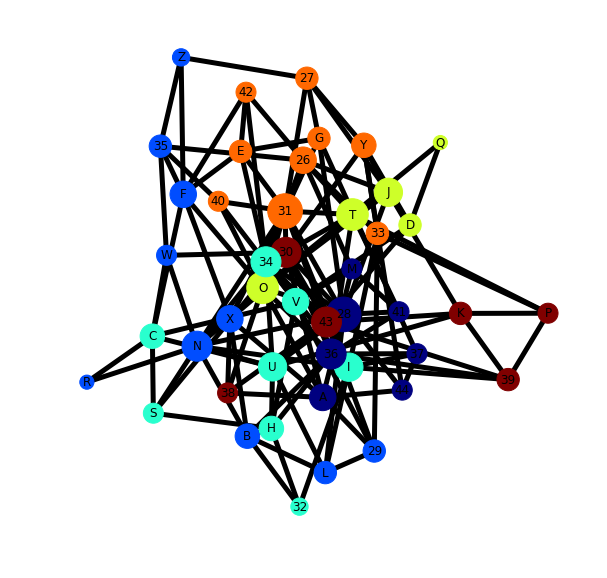

In [184]:
fig,ax = plt.subplots(1,1, figsize=(10,10))

nx.draw_spring(G, ax=ax,
                 node_size=degree*100, with_labels=True,
                 cmap = plt.get_cmap('jet'), node_color = values,
                 width=5)